# Market Basket Analysis - Grocery Data using Apriori Model
## The Apriori Model

* The Apriori Algorithm is the foundation of market basket analysis and is used to find items frequently bought together. This is very useful for retailers because:
    - Both X and Y can be placed on the same shelf so that buyers of one item would be prompted to buy the other.
    - Promotional discounts could be applied to just one out of the two items.
    - Advertisements on X could be targeted at buyers who purchase Y.
    - X and Y could be combined into a new product, such as having Y in flavors of X.
    
## Affinity analysis
- Affinity analysis is a data analysis and data mining technique that discovers **co-occurrence relationships** among activities performed by (or recorded about) specific individuals or groups.
- In general, this can be applied to any process where agents can be uniquely identified and information about their activities can be recorded. In retail, affinity analysis is used to **perform market basket analysis**, in which retailers seek to understand the purchase behavior of customers.

## Association Rule Mining
- Market Basket Analysis is one of the key techniques used by large retailers to uncover associations between items.
- It works by looking for **combinations of items that occur together frequently** in transactions. To put it another way, it allows retailers to identify relationships between the items that people buy.

## Apriori Algorithm
- Apriori is an algorithm for frequent itemset mining and association rule learning over relational databases.
- It proceeds by identifying the **frequent individual items** in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database. The frequent itemsets determined by Apriori can be used to determine association rules which highlight general trends in the database: this has applications in domains such as market basket analysis.
    - **Support**: This says how popular an itemset is, as measured by the proportion of transactions in which an itemset appears.
    - **Confidence**: This says how likely item Y is purchased when item X is purchased, expressed as {X -> Y}. This is measured by the proportion of transactions with item X, in which item Y also appears.
    - **Lift**: This says how likely item Y is purchased when item X is purchased while controlling for how popular item Y is.

In [20]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [21]:
!pip install squarify

In [22]:
!pip install PyARMViz

In [23]:
# Importing the modules

import sqlite3
import re
import os

from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

import squarify
import matplotlib
from matplotlib import style
import matplotlib.pyplot as plt
import seaborn as sns
from PyARMViz import PyARMViz
from PyARMViz.Rule import generate_rule_from_dict

In [24]:

# Connect to your database
conn = sqlite3.connect('products.db')
cursor = conn.cursor()

# Get all table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print(f"Number of tables: {len(tables)}")
print("Tables:", [table[0] for table in tables])

# Get all table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()



Number of tables: 6
Tables: ['customer', 'product', 'product_details', 'ratings', 'reviews', 'transactions']


In [25]:
# Display each table and its contents
for table in tables:
    table_name = table[0]
    print(f"\n{'='*50}")
    print(f"TABLE: {table_name}")
    print(f"{'='*50}")
    df = pd.read_sql_query(f"SELECT * FROM {table_name}", conn)
    print(df)
    print(f"Shape: {df.shape} (rows, columns)\n")


TABLE: customer
                           user_id first_name last_name  age
0     AHNTBBOCVJSXTQ7SBFAO2KS3BUXA      Linda    Keller   64
1     AGM3YP753ITBWIEJ7ESAZVLMD7AQ     Angela   Mcgrath   35
2     AEIMSJ6H563BKNO2OAGBP7D736PQ     Rachel      Hart   50
3     AHD5DXKPN6RBJFDJTOQWQKKTDHJQ     Brandy     Scott   20
4     AGB7TRSICVT7ORW66KE4ZRZ2KNRQ      Alice    Brooks   63
...                            ...        ...       ...  ...
2122  AFOASAW4HQGTIGDN6LSM4EDEN3XQ      Susan  Calderon   13
2123  AGSEUO77ALL4RW25ODIH2UINCI4A    Antonio      Cole   13
2124  AE6Z44KMO6NKWNHG5K4VKOGESRNA      Tyler   Gilbert   16
2125  AHPFHP43AXWRYZZ4HPNCW7I7J3ZQ   Jermaine     Lynch   63
2126  AHODIBBJYTI5UOYOQAUHKTW43HCA     Alicia   Schmidt   30

[2127 rows x 4 columns]
Shape: (2127, 4) (rows, columns)


TABLE: product
    item_id                                    item  \
0        25                           Dried Berries   
1        29                                  Turkey   
2       155

In [26]:
print("customer table")
pd.read_sql_query(f"SELECT * FROM customer", conn)

customer table


,user_id,first_name,last_name,age
0,AHNTBBOCVJSXTQ7SBFAO2KS3BUXA,Linda,Keller,64
1,AGM3YP753ITBWIEJ7ESAZVLMD7AQ,Angela,Mcgrath,35
2,AEIMSJ6H563BKNO2OAGBP7D736PQ,Rachel,Hart,50
3,AHD5DXKPN6RBJFDJTOQWQKKTDHJQ,Brandy,Scott,20
4,AGB7TRSICVT7ORW66KE4ZRZ2KNRQ,Alice,Brooks,63
...,...,...,...,...
2122,AFOASAW4HQGTIGDN6LSM4EDEN3XQ,Susan,Calderon,13
2123,AGSEUO77ALL4RW25ODIH2UINCI4A,Antonio,Cole,13
2124,AE6Z44KMO6NKWNHG5K4VKOGESRNA,Tyler,Gilbert,16
2125,AHPFHP43AXWRYZZ4HPNCW7I7J3ZQ,Jermaine,Lynch,63


In [27]:
print("product table")
pd.read_sql_query(f"SELECT * FROM product", conn)

product table


,item_id,item,category
0,25,Dried Berries,Dried Fruits
1,29,Turkey,Meat & Seafood
2,155,"Jams, Jellies & Preserves","Jams, Jellies & Sweet Spreads"
3,36,Single Herbs & Spices,"Herbs, Spices & Seasonings"
4,65,Onion,Single Herbs & Spices
...,...,...,...
62,48,"Bottled Beverages, Water & Drink Mixes",Beverages
63,92,Nuts,Chocolate
64,72,Oils,"Cooking Oils, Vinegars & Sprays"
65,9,Chicken & Turkey,Meals & Entrees


In [28]:
print("product_details table")
pd.read_sql_query(f"SELECT * FROM product_details", conn)

product_details table


,item_id,title,price,store,description,image_url,brand,unit_count,manufacturer,flavor,color
0,26,Dark Roast Pure Coffee,NaN,Luzianne,NaN,https://m.media-amazon.com/images/I/81ucKSAein...,Luzianne,13.00 Ounce,NaN,NaN,None
1,13,PICARAS Galletas Peruanas Bañadas en Chocolate...,15.99,Winters,2 Bags of PICARAS Galletas Bañadas en Chocolat...,https://m.media-amazon.com/images/I/81-wr7u+ig...,Winters,12.00 Count,Winter's,chocolate,None
2,0,Asher's Sugar Free Milk Chocolate Cordial Cher...,29.99,Generic,NaN,NaN,Generic,16.0 Ounce,NaN,Chocolate,None
3,121,Chincoteague Seafood 90944 Vegetable Red Crab ...,73.57,Chincoteague Seafood,Vegetable Red Crab Soup is a colorful combinat...,NaN,Chincoteague Seafood,NaN,Chincoteague Seafood,Red Crab,None
4,55,"TAJ Indian Poha Powa Flattened Rice (Thick, 4-...",17.99,TAJ Gourmet Foods,TAJ Gourmet Foods provides the best of quality.,https://m.media-amazon.com/images/I/81gnkkdr8b...,TAJ Gourmet Foods,1.00 Count,TAJ Gourmet Foods,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...
62,109,"Paradise Green Cherry Halves, 10-Pound Tub",NaN,Paradise,Add a little WOW to your recipes. Pennant Gree...,NaN,NaN,NaN,Paradise,NaN,None
63,68,MIKEI MUSHROOM STICK RAMEN,NaN,Mikei,Product of Japan,https://m.media-amazon.com/images/I/71kI06vlbi...,MIKEI,2.00 Count,MIKEI,NaN,None
64,59,"Smithfield, Whipped Cream Cheese, 8 Ounce",NaN,Smithfield,Whipped Cream Cheese,https://m.media-amazon.com/images/I/81FIBKsTit...,NaN,NaN,Zausner,NaN,None
65,17,"MUSH Vanilla Almond Crunch Overnight Oats, 5 OZ",NaN,MUSH RAW OVERNIGHT OATS MUSHED WITH LOVE SAN D...,Grocery Dairy,https://m.media-amazon.com/images/I/71kzO5pczv...,NaN,NaN,MUSH,NaN,None


In [29]:
print("ratings table")
pd.read_sql_query(f"SELECT * FROM ratings", conn)

ratings table


,item_id,parent_asin,average_rating,rating_number
0,26,B00NE08WM6,4.7,9
1,13,B084Q13Q5Q,4.5,12
2,0,B0BN4PW255,5.0,6
3,121,B002HQF1BI,5.0,2
4,55,B0BYLK9168,4.4,203
...,...,...,...,...
1990,144,B09HSRGDTN,4.5,371
1991,9,B074XCBNY3,5.0,2
1992,41,B000ITUEDQ,4.5,11
1993,13,B07DFQMTTH,4.1,20


In [30]:
print("Reviews table")
pd.read_sql_query(f"SELECT * FROM reviews", conn)

Reviews table


,rating,title,text,asin,parent_asin,user_id,timestamp,verified_purchase,helpful_vote
0,5.0,Excellent! Yummy!,Excellent!! Yummy! Great with other foods and...,B00CM36GAQ,B00CM36GAQ,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1.587854e+12,1,0.0
1,5.0,Delicious!!! Yum!,Excellent! The best! I use it with my beef a...,B074J5WVYH,B0759B7KLH,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1.587854e+12,1,0.0
2,5.0,"Extremely Delicious, but expensive imo",These are very tasty. They are extremely soft ...,B079TRNVHX,B079TRNVHX,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1.587853e+12,1,1.0
3,5.0,Delicious!,My favorite!,B07194LN2Z,B07194LN2Z,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1.581313e+12,1,0.0
4,5.0,Great taste,Great for making brownies and crinkle cookies.,B005CD4196,B005CD4196,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1.581313e+12,1,7.0
...,...,...,...,...,...,...,...,...,...
16084,2.0,Two Stars,Very weak in concentrated flavor,B00KH9V3B4,B0C31JTX46,AHOMGA3YMKCGXBD3MEZDSKKYQRCQ,1.480514e+12,1,1.0
16085,5.0,Good ginger,I make a lot of ginger cookies and use this gi...,B0773WL77V,B0C9VYSB83,AETTGDSJDM554ISAC6U5N3WIZQ6A,1.628178e+12,1,1.0
16086,5.0,Tasty,Good taste. Too much money,B07W6WRYT9,B0B62J6KN6,AETTGDSJDM554ISAC6U5N3WIZQ6A,1.627407e+12,1,0.0
16087,2.0,Company does not stand by the product,The canister leaked from the bottom. Made a gr...,B00FH8PGB8,B0B8C9D7BR,AETTGDSJDM554ISAC6U5N3WIZQ6A,1.627407e+12,1,2.0


In [31]:
print("transactions table")
pd.read_sql_query(f"SELECT * FROM transactions", conn)

transactions table


,Member_number,Date,item,item_id
0,1808,21-07-2015,tropical fruit,0
1,2552,5/1/2015,whole milk,1
2,2300,19-09-2015,pip fruit,2
3,1187,12/12/2015,other vegetables,3
4,3037,1/2/2015,whole milk,1
...,...,...,...,...
38760,4471,8/10/2014,sliced cheese,75
38761,2022,23-02-2014,candy,64
38762,1097,16-04-2014,cake bar,153
38763,1510,3/12/2014,fruit/vegetable juice,11


In [32]:
# Create DataFrame from transactions table
df_transactions = pd.read_sql("SELECT * FROM transactions", conn)
df_transactions.head()


,Member_number,Date,item,item_id
0,1808,21-07-2015,tropical fruit,0
1,2552,5/1/2015,whole milk,1
2,2300,19-09-2015,pip fruit,2
3,1187,12/12/2015,other vegetables,3
4,3037,1/2/2015,whole milk,1


In [33]:
print(df_transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Member_number  38765 non-null  int64 
 1   Date           38765 non-null  object
 2   item           38765 non-null  object
 3   item_id        38765 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.2+ MB
None


In [34]:
df_transactions.describe()

,Member_number,item_id
count,38765.000000,38765.000000
mean,3003.641868,38.956094
std,1153.611031,37.294166
min,1000.000000,0.000000
25%,2002.000000,8.000000
50%,3005.000000,24.000000
75%,4007.000000,63.000000
max,5000.000000,166.000000


In [35]:
# convert the Date column from its current object format into a proper datetime object.
df_transactions['Date'] = pd.to_datetime(df_transactions['Date'], format='mixed')
print(f"\nData type: {df_transactions['Date'].dtype}")
print(df_transactions['Date'].head(10))




Data type: datetime64[ns]
0   2015-07-21
1   2015-05-01
2   2015-09-19
3   2015-12-12
4   2015-01-02
5   2015-02-14
6   2015-08-05
7   2015-12-23
8   2015-03-20
9   2015-12-02
Name: Date, dtype: datetime64[ns]


In [36]:
# Get the data of purchases made by Member Number: 1808 in an accending order of date (oldest to newest)
df_transactions[df_transactions['Member_number'] == 1808].sort_values(by='Date')

,Member_number,Date,item,item_id
9090,1808,2014-11-29,meat,56
25239,1808,2014-11-29,whole milk,1
11488,1808,2014-12-15,sugar,34
27637,1808,2014-12-15,citrus fruit,6
38731,1808,2014-12-15,napkins,113
4355,1808,2015-04-02,long life bakery product,118
20504,1808,2015-04-02,semi-finished bread,102
0,1808,2015-07-21,tropical fruit,0
16149,1808,2015-07-21,rolls/buns,4
36088,1808,2015-07-21,candy,64


In [37]:
# Lets get the items purchased from each transaction (purchases made by a member on a single date)
#   We can achive that by:
#       1. Grouping all uniques combinations of Member_number and Date in the 'basket' DataFrame.
#       2. After grouping, select the 'itemDescription' column from each group
#       3. Create a list of all the items in each group (each group contains itemDescription i.e. items purchased in a single transaction)
#       4. Create a list of of all the lists created in the step before

transactions = df_transactions.groupby(['Member_number', 'Date'])['item'].apply(list).tolist()
print(len(transactions))
transactions[0]

14963


['whole milk', 'pastry', 'salty snack']

# Preparing Dataset

In [38]:
# Using the TransactionEncoder from the mlxtend module to encode our data
te = TransactionEncoder()
te_arry = te.fit(transactions).transform(transactions)
te_arry

array([[False, False, False, ...,  True, False, False],
       [False, False, False, ...,  True,  True, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

```
What TransactionEncoder does:

Before encoding (list of transactions):
transactions = [
    ['milk', 'bread', 'butter'],
    ['milk', 'bread'],
    ['milk', 'eggs'],
    ['bread', 'butter', 'eggs']
]

After encoding (binary matrix):
       bread  butter   eggs   milk
    0   True    True  False   True   # transaction 0 has bread, butter, milk
    1   True   False  False   True   # transaction 1 has bread, milk
    2  False   False   True   True   # transaction 2 has eggs, milk
    3   True    True   True  False   # transaction 3 has bread, butter, eggs

In [39]:
# Converting to a Pandas DataFrame
transactions = pd.DataFrame(te_arry, columns=te.columns_)
transactions

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
# Creating a count of the individual items purchased
pf = transactions.describe()

# Confirming if False is the top(most frequent/common) for all 167 columns (False indicates item wasn't purchased)
print(pf.loc['top'].unique())
pf

[np.False_]


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
count,14963,14963,14963,14963,14963,14963,14963,14963,14963,14963,...,14963,14963,14963,14963,14963,14963,14963,14963,14963,14963
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,14903,14643,14941,14934,14960,14959,14842,14946,14455,14637,...,14883,14912,14686,14309,14955,14604,14788,12600,13678,14903


In [41]:
# Count of the individual items is count (non-null entires) minus freq (count of most common value in that column--> false)
pf.loc['number_of_purchases'] = pf.loc['count'] - pf.loc['freq']
a = pf.transpose()
item = pd.DataFrame(a['number_of_purchases']).reset_index()
item = item.sort_values('number_of_purchases', ascending=False)

# Renaming the columns
item.columns = ['item', 'count']
item

,item,count
164,whole milk,2363
102,other vegetables,1827
122,rolls/buns,1646
138,soda,1453
165,yogurt,1285
...,...,...
124,rubbing alcohol,5
5,bags,4
4,baby cosmetics,3
79,kitchen utensil,1


#Visualization the Top 50 Items as a Treemap

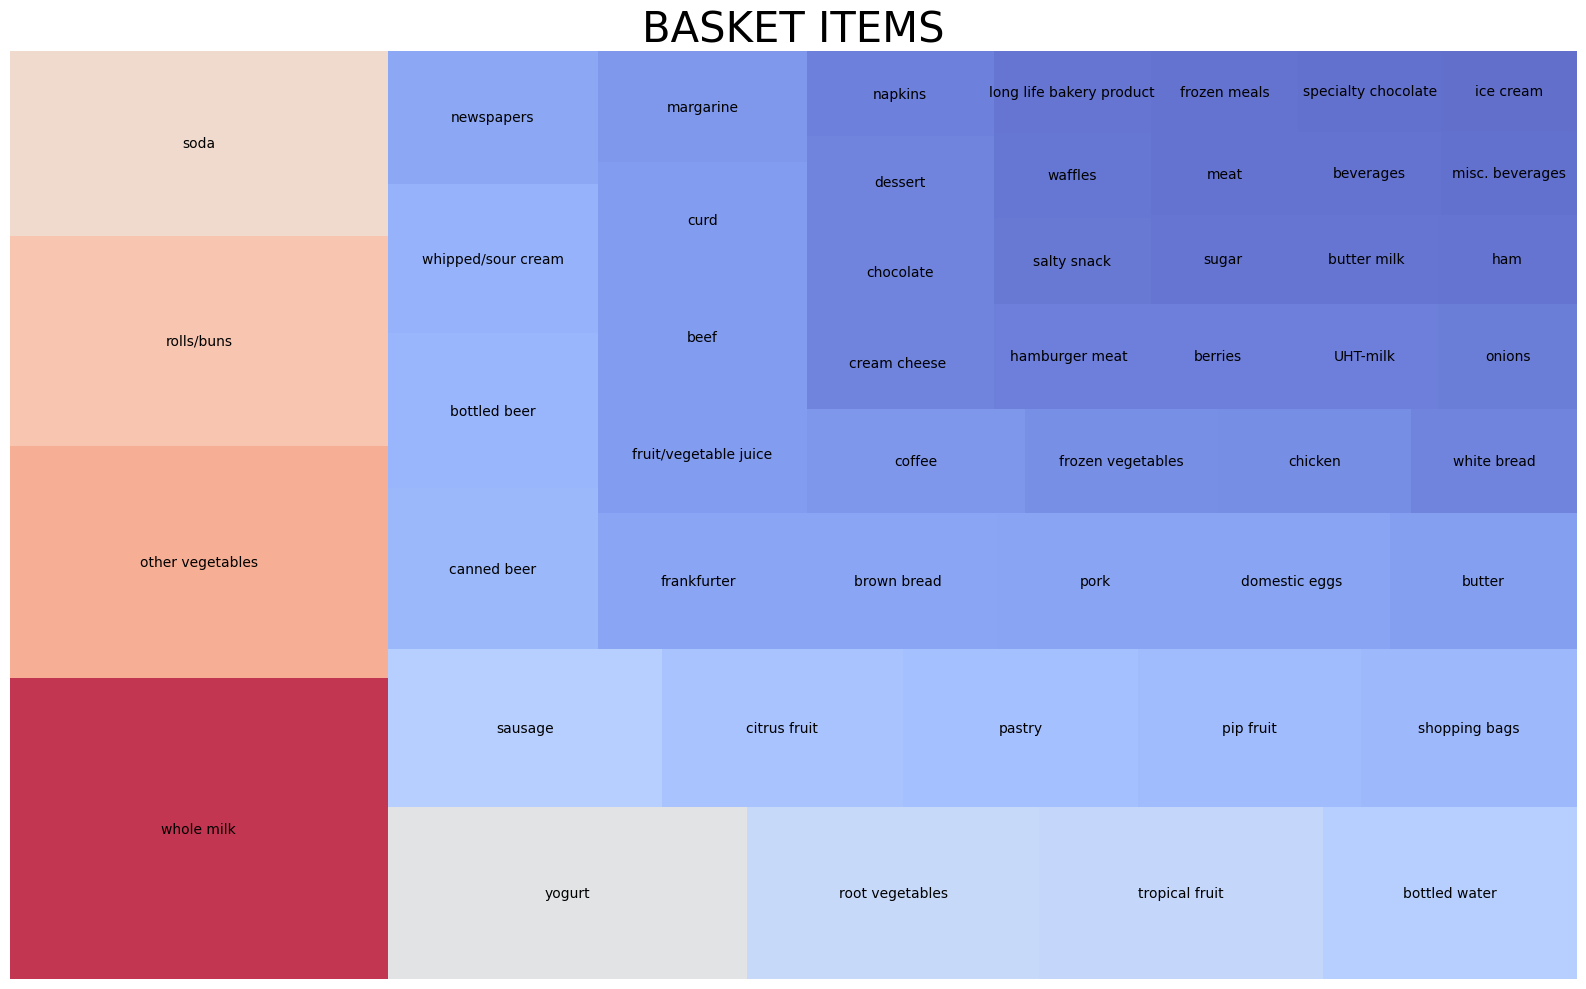

In [42]:
fig, ax = plt.subplots(figsize=(16, 10))

# Setting the color scheme
cmap = matplotlib.cm.coolwarm

# Getting the upper and lower bounds for the color mapping
mini = min(item['count'].head(50))
maxi = max(item['count'].head(50))

# Set out color mapping limits
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)

# Obtain the raw colors
colors = [cmap(norm(value)) for value in item['count'].head(50)]

# Create the TreeMap plot with Squarify
squarify.plot(sizes=item['count'].head(50), label=item['item'].head(50), alpha=0.8, color=colors)
plt.axis('off')
plt.title('BASKET ITEMS', fontsize=30)
ttl = ax.title
ttl.set_position([.5,1.05])

plt.tight_layout()  # to prevent cutoff

plt.show()

## Using the Apriori Algorithm
**Association rules analysis** is a technique to uncover how items are associated to each other. There are three common ways to measure association.</br>

 - **Measure 1: Support.** This says how popular an itemset is, as measured by the proportion of transactions in which an itemset appears. In the Table above, the support of {apple} is 4 out of 8, or 50%. Itemsets can also contain multiple items. For instance, the support of {apple, beer, rice} is 2 out of 8, or 25%.</br>
 - **Measure 2: Confidence.** This says how likely item Y is purchased when item X is purchased, expressed as {X -> Y}. This is measured by the proportion of transactions with item X, in which item Y also appears. In Table 1, the confidence of {apple -> beer} is 3 out of 4, or 75%.</br>
 - **Measure 3: Lift.** This says how likely item Y is purchased when item X is purchased, while controlling for how popular item Y is. In Table 1, the lift of {apple -> beer} is 1,which implies no association between items. A lift value greater than 1 means that item Y is likely to be bought if item X is bought, while a value less than 1 means that item Y is unlikely to be bought if item X is bought.</br>


In [43]:
frequent_itemsets = apriori(transactions, min_support=0.001, use_colnames=True, max_len=5)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))             # Length refers to the number of items in itemset (length of an item set)
frequent_itemsets

,support,itemsets,length
0,0.004010,(Instant food products),1
1,0.021386,(UHT-milk),1
2,0.001470,(abrasive cleaner),1
3,0.001938,(artif. sweetener),1
4,0.008087,(baking powder),1
...,...,...,...
745,0.001136,"(whole milk, sausage, rolls/buns)",3
746,0.001002,"(whole milk, soda, rolls/buns)",3
747,0.001337,"(whole milk, yogurt, rolls/buns)",3
748,0.001069,"(whole milk, soda, sausage)",3


The above table provides all the association rules for basket analysis

In [44]:
b = association_rules(frequent_itemsets, metric="lift", min_threshold=0.001)
b['uni'] = np.nan
b['ant'] = np.nan
b['con'] = np.nan
b['tot'] = 14963            # Total number of transactions
b

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,uni,ant,con,tot
0,(UHT-milk),(bottled water),0.021386,0.060683,0.001069,0.050000,0.823954,1.0,-0.000228,0.988755,-0.179204,0.013201,-0.011373,0.033811,NaN,NaN,NaN,14963
1,(bottled water),(UHT-milk),0.060683,0.021386,0.001069,0.017621,0.823954,1.0,-0.000228,0.996168,-0.185312,0.013201,-0.003847,0.033811,NaN,NaN,NaN,14963
2,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,1.0,-0.000473,0.975443,-0.184234,0.015130,-0.025175,0.058758,NaN,NaN,NaN,14963
3,(other vegetables),(UHT-milk),0.122101,0.021386,0.002139,0.017515,0.818993,1.0,-0.000473,0.996060,-0.201119,0.015130,-0.003956,0.058758,NaN,NaN,NaN,14963
4,(UHT-milk),(rolls/buns),0.021386,0.110005,0.001804,0.084375,0.767013,1.0,-0.000548,0.972009,-0.236873,0.013925,-0.028798,0.050389,NaN,NaN,NaN,14963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,"(whole milk, sausage)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,1.0,0.000701,1.093681,0.481231,0.015748,0.085657,0.090650,NaN,NaN,NaN,14963
1234,"(yogurt, sausage)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,1.0,0.000563,1.131541,0.384877,0.009065,0.116250,0.132562,NaN,NaN,NaN,14963
1235,(whole milk),"(yogurt, sausage)",0.157923,0.005748,0.001470,0.009310,1.619866,1.0,0.000563,1.003596,0.454430,0.009065,0.003583,0.132562,NaN,NaN,NaN,14963
1236,(yogurt),"(whole milk, sausage)",0.085879,0.008955,0.001470,0.017121,1.911760,1.0,0.000701,1.008307,0.521727,0.015748,0.008239,0.090650,NaN,NaN,NaN,14963


In [45]:
# delete the .db file if it exists already
file_path = '/content/product_apriori.db'

if os.path.exists(file_path):
    os.remove(file_path)
    print(f"✓ Deleted: {file_path}")
else:
    print(f"File doesn't exist: {file_path}")

File doesn't exist: /content/product_apriori.db


# Add the association table in a new database

In [46]:
import sqlite3
import pandas as pd

# Step 1: Connect to the original database
conn_old = sqlite3.connect('products.db')
cursor_old = conn_old.cursor()

# Step 2: Get all table names from products.db
cursor_old.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor_old.fetchall()
table_names = [table[0] for table in tables]
print(f"Found {len(table_names)} tables in products.db:")
print(table_names)

# Step 3: Create new database
conn_new = sqlite3.connect('product_apriori.db')

# Step 4: Copy each table from old database to new database
for table_name in table_names:
    print(f"Copying table: {table_name}")
    # Read the entire table from old database
    df = pd.read_sql(f"SELECT * FROM {table_name}", conn_old)
    # Write it to the new database
    df.to_sql(table_name, conn_new, if_exists='replace', index=False)

# Step 5: Process market_basket table with ID mappings
print("\nAdding market_basket table...")

# Load the transactions table to get item to item_id mapping
transactions_df = pd.read_sql("SELECT DISTINCT item_id, item FROM transactions", conn_old)
item_to_id = dict(zip(transactions_df['item'], transactions_df['item_id']))

print(f"Loaded {len(item_to_id)} unique items from transactions table")

# Create a copy to avoid modifying the original
b_copy = b.copy()

# Function to map item names to IDs
def map_items_to_ids(items_frozenset):
    if isinstance(items_frozenset, frozenset):
        item_list = list(items_frozenset)
        ids = [item_to_id.get(item) for item in item_list if item in item_to_id]
        return ', '.join(map(str, ids)) if ids else None
    return None

# Convert frozensets to strings and create ID columns
b_copy['antecedents'] = b_copy['antecedents'].apply(
    lambda x: ', '.join(list(x)) if isinstance(x, frozenset) else str(x)
)
b_copy['consequents'] = b_copy['consequents'].apply(
    lambda x: ', '.join(list(x)) if isinstance(x, frozenset) else str(x)
)

# Add ID columns by mapping item names to IDs from transactions table
b_copy['antecedents_id'] = b['antecedents'].apply(map_items_to_ids)
b_copy['consequents_id'] = b['consequents'].apply(map_items_to_ids)

# Select only the required columns
market_basket_final = b_copy[[
    'antecedents',
    'consequents',
    'antecedents_id',
    'consequents_id',
    'antecedent support',
    'consequent support',
    'support',
    'confidence',
    'lift'
]]

# Save to database
market_basket_final.to_sql('market_basket', conn_new, if_exists='replace', index=False)

print(f"✓ Market basket table created with {len(market_basket_final)} rows")
print(f"✓ Columns: {list(market_basket_final.columns)}")

# Check for any missing mappings
null_antecedents = market_basket_final['antecedents_id'].isnull().sum()
null_consequents = market_basket_final['consequents_id'].isnull().sum()
if null_antecedents > 0 or null_consequents > 0:
    print(f"⚠ Warning: {null_antecedents} rows with missing antecedents_id, {null_consequents} rows with missing consequents_id")

# Step 6: Verify the new database
cursor_new = conn_new.cursor()
cursor_new.execute("SELECT name FROM sqlite_master WHERE type='table';")
new_tables = cursor_new.fetchall()

print(f"\n{'='*50}")
print("NEW DATABASE CREATED SUCCESSFULLY!")
print(f"{'='*50}")
print(f"Total tables in product_apriori.db: {len(new_tables)}")
print("Tables:", [table[0] for table in new_tables])

# Display sample data from market_basket table
print(f"\n{'='*50}")
print("MARKET_BASKET TABLE SAMPLE")
print(f"{'='*50}")
market_basket_sample = pd.read_sql("SELECT * FROM market_basket LIMIT 5", conn_new)
print(market_basket_sample)

print("\n✓ Connections kept open for further queries")

Found 6 tables in products.db:
['customer', 'product', 'product_details', 'ratings', 'reviews', 'transactions']
Copying table: customer
Copying table: product
Copying table: product_details
Copying table: ratings
Copying table: reviews
Copying table: transactions

Adding market_basket table...
Loaded 167 unique items from transactions table
✓ Market basket table created with 1238 rows
✓ Columns: ['antecedents', 'consequents', 'antecedents_id', 'consequents_id', 'antecedent support', 'consequent support', 'support', 'confidence', 'lift']

NEW DATABASE CREATED SUCCESSFULLY!
Total tables in product_apriori.db: 7
Tables: ['customer', 'product', 'product_details', 'ratings', 'reviews', 'transactions', 'market_basket']

MARKET_BASKET TABLE SAMPLE
        antecedents       consequents antecedents_id consequents_id  \
0          UHT-milk     bottled water             63             16   
1     bottled water          UHT-milk             16             63   
2          UHT-milk  other vegetable

In [47]:
# reading back from database
pd.read_sql("SELECT * FROM market_basket", conn_new)


,antecedents,consequents,antecedents_id,consequents_id,antecedent support,consequent support,support,confidence,lift
0,UHT-milk,bottled water,63,16,0.021386,0.060683,0.001069,0.050000,0.823954
1,bottled water,UHT-milk,16,63,0.060683,0.021386,0.001069,0.017621,0.823954
2,UHT-milk,other vegetables,63,3,0.021386,0.122101,0.002139,0.100000,0.818993
3,other vegetables,UHT-milk,3,63,0.122101,0.021386,0.002139,0.017515,0.818993
4,UHT-milk,rolls/buns,63,4,0.021386,0.110005,0.001804,0.084375,0.767013
...,...,...,...,...,...,...,...,...,...
1233,"whole milk, sausage",yogurt,"1, 18",17,0.008955,0.085879,0.001470,0.164179,1.911760
1234,"yogurt, sausage",whole milk,"17, 18",1,0.005748,0.157923,0.001470,0.255814,1.619866
1235,whole milk,"yogurt, sausage",1,"17, 18",0.157923,0.005748,0.001470,0.009310,1.619866
1236,yogurt,"whole milk, sausage",17,"1, 18",0.085879,0.008955,0.001470,0.017121,1.911760


#Vizualising the Data

In [48]:
transactions = df_transactions.groupby(['Member_number', 'Date'])['item'].apply(list).tolist()

def trans():
    for t in transactions:
        yield t


def ant(x):
    cnt=0
    for t in trans():
        t= set(t)
        if x.intersection(x) == x:
            cnt = cnt+1
    return cnt

bb = b.values.tolist()
b

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,uni,ant,con,tot
0,(UHT-milk),(bottled water),0.021386,0.060683,0.001069,0.050000,0.823954,1.0,-0.000228,0.988755,-0.179204,0.013201,-0.011373,0.033811,NaN,NaN,NaN,14963
1,(bottled water),(UHT-milk),0.060683,0.021386,0.001069,0.017621,0.823954,1.0,-0.000228,0.996168,-0.185312,0.013201,-0.003847,0.033811,NaN,NaN,NaN,14963
2,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,1.0,-0.000473,0.975443,-0.184234,0.015130,-0.025175,0.058758,NaN,NaN,NaN,14963
3,(other vegetables),(UHT-milk),0.122101,0.021386,0.002139,0.017515,0.818993,1.0,-0.000473,0.996060,-0.201119,0.015130,-0.003956,0.058758,NaN,NaN,NaN,14963
4,(UHT-milk),(rolls/buns),0.021386,0.110005,0.001804,0.084375,0.767013,1.0,-0.000548,0.972009,-0.236873,0.013925,-0.028798,0.050389,NaN,NaN,NaN,14963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,"(whole milk, sausage)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,1.0,0.000701,1.093681,0.481231,0.015748,0.085657,0.090650,NaN,NaN,NaN,14963
1234,"(yogurt, sausage)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,1.0,0.000563,1.131541,0.384877,0.009065,0.116250,0.132562,NaN,NaN,NaN,14963
1235,(whole milk),"(yogurt, sausage)",0.157923,0.005748,0.001470,0.009310,1.619866,1.0,0.000563,1.003596,0.454430,0.009065,0.003583,0.132562,NaN,NaN,NaN,14963
1236,(yogurt),"(whole milk, sausage)",0.085879,0.008955,0.001470,0.017121,1.911760,1.0,0.000701,1.008307,0.521727,0.015748,0.008239,0.090650,NaN,NaN,NaN,14963


In [49]:
rules_dict = []
for bbb in bb:
    bbb[10] = ant(bbb[0])
    bbb[11] = ant(bbb[1])
    bbb[9] = ant(bbb[0].union(bbb[1]))
    diction = {
        'lhs': tuple(bbb[0]),
        'rhs': tuple(bbb[1]),
        'count_full': bbb[9],
        'count_lhs': bbb[10],
        'count_rhs': bbb[11],
        'num_transactions': bbb[12]
    }
    rules_dict.append(diction)

In [50]:
rules = []
for rd in rules_dict:
    rules.append(generate_rule_from_dict(rd))

rules[0:10] # first ten rules

[{UHT-milk} -> {bottled water},
 {bottled water} -> {UHT-milk},
 {UHT-milk} -> {other vegetables},
 {other vegetables} -> {UHT-milk},
 {UHT-milk} -> {rolls/buns},
 {rolls/buns} -> {UHT-milk},
 {UHT-milk} -> {root vegetables},
 {root vegetables} -> {UHT-milk},
 {UHT-milk} -> {sausage},
 {sausage} -> {UHT-milk}]